In [1]:
import torch
import torchvision
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST, SVHN
from torchvision.transforms import ToTensor

# 1. Dataset Loading and Preprocessing

In [ ]:
# Load datasets
mnist_train = MNIST(root='./data', train=True, download=False, transform=ToTensor())
mnist_test = MNIST(root='./data', train=False, download=False, transform=ToTensor())
svhn_train = SVHN(root='./data', split='train', download=False, transform=ToTensor())
svhn_test = SVHN(root='./data', split='test', download=False, transform=ToTensor())


In [ ]:
# Print the total number of samples in each dataset
print(f'Total number of samples in MNIST training set: {len(mnist_train)}')
print(f'Total number of samples in MNIST test set: {len(mnist_test)}')

print(f'Total number of samples in SVHN training set: {len(svhn_train)}')
print(f'Total number of samples in SVHN test set: {len(svhn_test)}')


Total number of samples in MNIST training set: 60000
Total number of samples in MNIST test set: 10000
Total number of samples in SVHN training set: 73257
Total number of samples in SVHN test set: 26032


## Split each dataset into training (70%), validation (10%), and testing (20%) sets.

In [ ]:
# Set seed for reproducibility
seed = 42
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)

# Split datasets
def split_dataset(train_dataset, test_dataset, train_ratio=0.7, val_ratio=0.1, test_ratio=0.2):
    dataset = train_dataset + test_dataset

    # Calculate sizes
    train_size = int(train_ratio * len(dataset))
    val_size = int(val_ratio * len(dataset))
    test_size = len(dataset) - train_size - val_size

    # Split the dataset using random_split
    train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

    return train_dataset, val_dataset, test_dataset

mnist_train, mnist_val, mnist_test = split_dataset(mnist_train, mnist_test)
svhn_train, svhn_val, svhn_test = split_dataset(svhn_train, svhn_test)

# Print the sizes
print(f"MNIST :\n Training set size: {len(mnist_train)} \n Validation set size: {len(mnist_val)}\n Test set size: {len(mnist_test)}")
print(f"SVHN :\n Training set size: {len(svhn_train)} \n Validation set size: {len(svhn_val)} \n Test set size: {len(svhn_test)}")

MNIST :
 Training set size: 49000 
 Validation set size: 7000
 Test set size: 14000
SVHN :
 Training set size: 69502 
 Validation set size: 9928 
 Test set size: 19859


## Plot the images

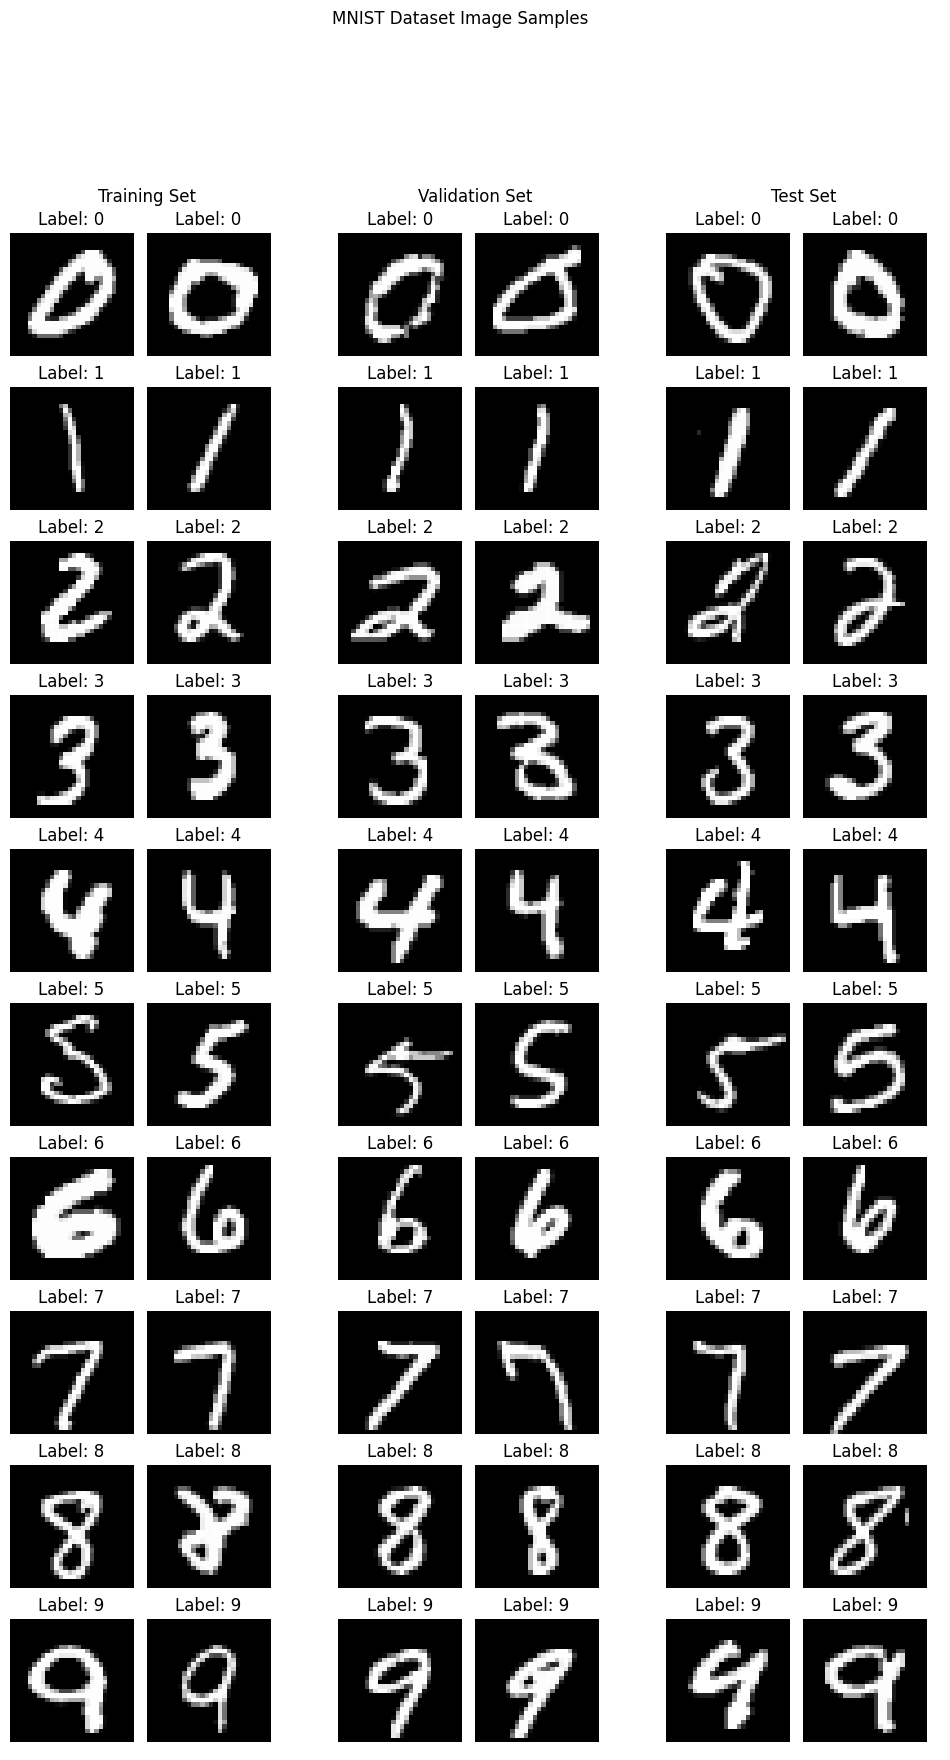

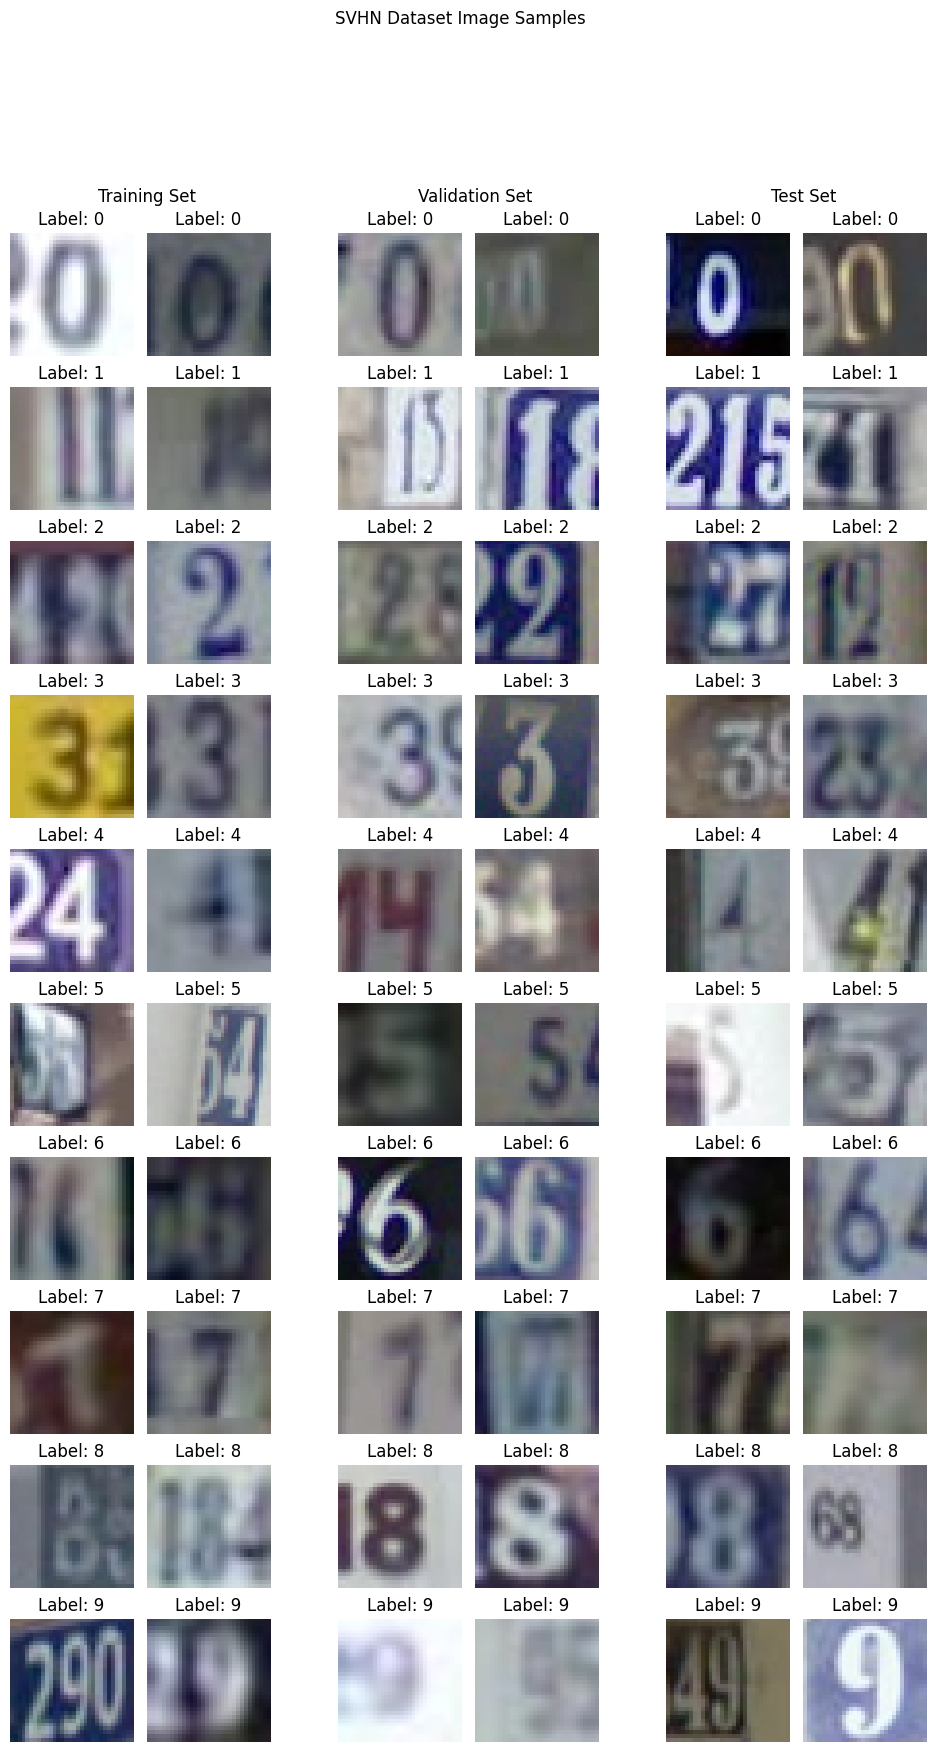

In [ ]:
# Function to plot images in a 1x3 grid for a dataset
def plot_dataset_grid(dataset, title, num_images=2):
    fig, axes = plt.subplots(1, 3, figsize=(12, 20))  # 1x3 grid
    fig.suptitle(title)
    splits = ['Training Set', 'Validation Set', 'Test Set']

    for i, (data, split_name) in enumerate(zip(dataset, splits)):
        data_loader = DataLoader(data, batch_size=1, shuffle=False)
        class_counts = {i: 0 for i in range(10)}
        ax = axes[i]
        ax.set_title(split_name)
        ax.axis('off')  # Hide axes for the main grid

        # Create a subgrid for the images
        subgrid = ax.inset_axes([0, 0, 1, 1])  # Create a subplot within the main grid
        subgrid.axis('off')  # Hide axes for the subgrid

        for img, label in data_loader:
            label = label.item()  # Convert tensor to integer
            if class_counts[label] < num_images:
                img_ax = subgrid.inset_axes([class_counts[label] * 0.5, (9 - label) * 0.1, 0.45, 0.09])  # Position each image
                if img.shape[1] == 1:  # Grayscale image
                    img_ax.imshow(img.squeeze().numpy(), cmap='gray')
                else:  # RGB image
                    img_ax.imshow(np.transpose(img.squeeze().numpy(), (1, 2, 0)))
                img_ax.set_title(f'Label: {label}')
                img_ax.axis('off')
                class_counts[label] += 1
            if all(count >= num_images for count in class_counts.values()):
                break
    plt.show()

# Define the datasets as lists of splits
mnist_splits = [mnist_train, mnist_val, mnist_test]
svhn_splits = [svhn_train, svhn_val, svhn_test]

# Plot MNIST and SVHN datasets in 1x3 grids
plot_dataset_grid(mnist_splits, 'MNIST Dataset Image Samples')
plot_dataset_grid(svhn_splits, 'SVHN Dataset Image Samples')

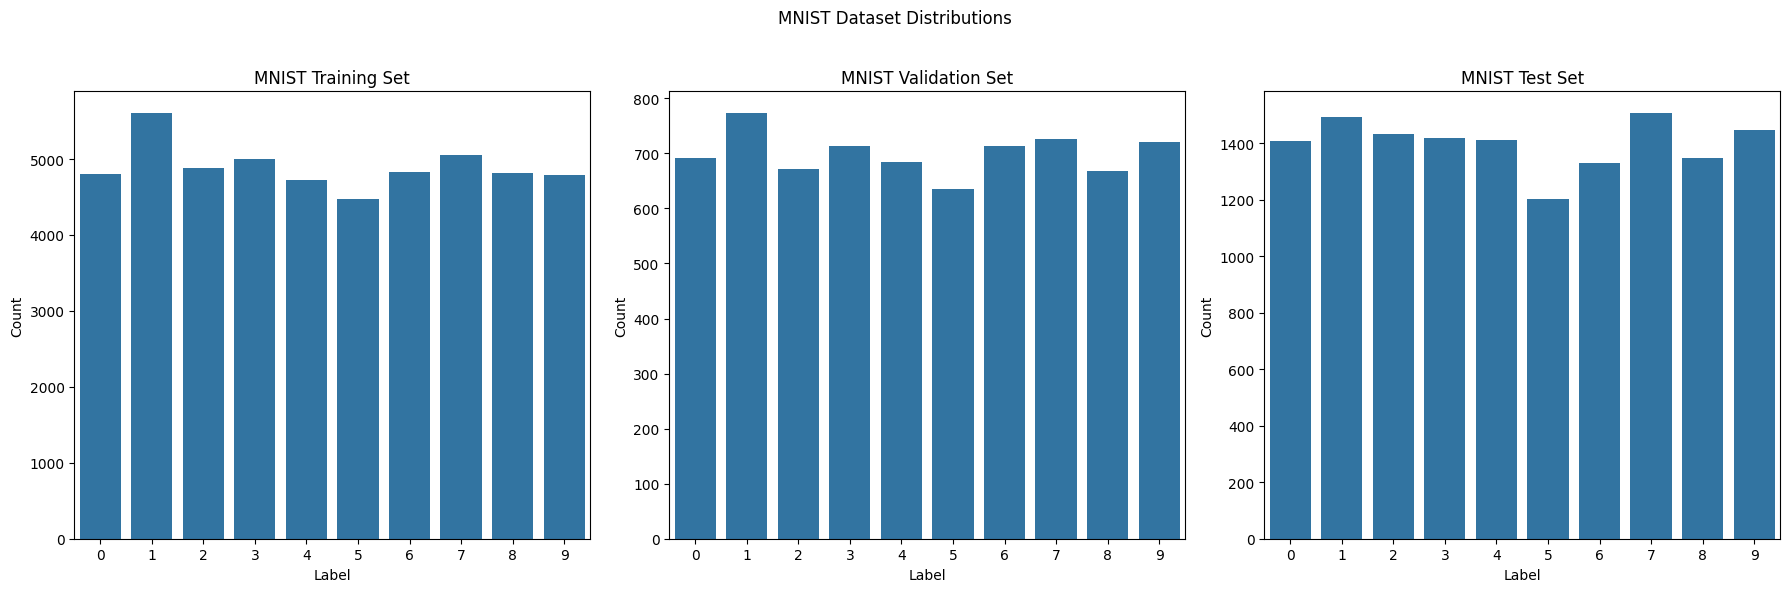

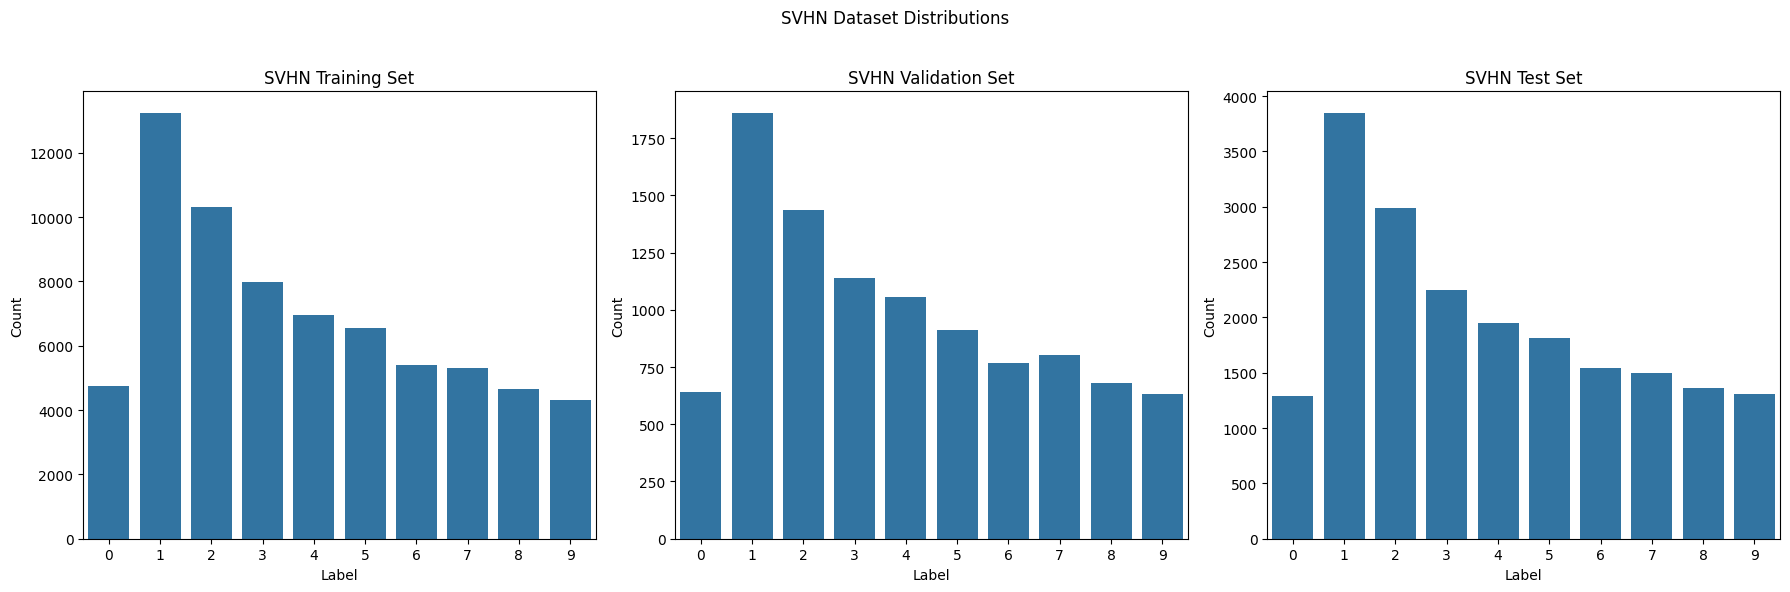

In [ ]:
# Function to plot label distribution
def plot_label_distribution(dataset, title, ax):
    labels = [label for _, label in DataLoader(dataset, batch_size=1)]
    labels = [label.item() for label in labels]
    sns.countplot(x=labels, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('MNIST Dataset Distributions')
plot_label_distribution(mnist_train, 'MNIST Training Set', axes[0])
plot_label_distribution(mnist_val, 'MNIST Validation Set', axes[1])
plot_label_distribution(mnist_test, 'MNIST Test Set', axes[2])
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('SVHN Dataset Distributions')
plot_label_distribution(svhn_train, 'SVHN Training Set', axes[0])
plot_label_distribution(svhn_val, 'SVHN Validation Set', axes[1])
plot_label_distribution(svhn_test, 'SVHN Test Set', axes[2])
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 2. Building and Training the CNN Model

# 3. Model Evaluation and Visualization